**Table of contents**<a id='toc0_'></a>    
- [Import statements](#toc1_1_)    
- [**Runtime rc settings**](#toc1_2_)    
  - [*Direct modification of the parameter values of the `matplotlib.rcParams` dictionary*](#toc1_2_1_)    
  - [*Modify multiple settings of a single group (e.g, lines, font, animation, figure, axes etc.) at once with `matplotlib.rc()`*](#toc1_2_2_)    
  - [*Restore the rcParams from Matplotlib's internal default style using `matplotlib.rcdefaults()`*](#toc1_2_3_)    
  - [*Temporarily change rc settings with the `matplotlib.rc_context()` context manager*](#toc1_2_4_)    
- [**Style Sheets**](#toc1_3_)    
  - [*Temporary styling with style sheets using the `plt.style.context()` context manager*](#toc1_3_1_)    

<!-- vscode-jupyter-toc-config
	numbering=false
	anchor=true
	flat=false
	minLevel=2
	maxLevel=5
	/vscode-jupyter-toc-config -->
<!-- THIS CELL WILL BE REPLACED ON TOC UPDATE. DO NOT WRITE YOUR TEXT IN THIS CELL -->

### <a id='toc1_1_'></a>[Import statements](#toc0_)

In [1]:
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from numpy.random import default_rng

rng = default_rng()

In [3]:
std_normal_data = rng.standard_normal((50))

# Plot customization: rcParams and Style sheets ([Docs](https://matplotlib.org/stable/tutorials/introductory/customizing.html))

There are three ways to customize Matplotlib styles:
- Setting rcParams at runtime.
- Using style sheets.
- Changing your matplotlibrc file.

Setting rcParams at runtime takes precedence over style sheets, style sheets take precedence over matplotlibrc files.

### <a id='toc1_2_'></a>[**Runtime rc settings**](#toc0_)

All rc settings are stored in a dictionary-like variable called *matplotlib.rcParams*, which is global to the matplotlib package. See the documentation @https://matplotlib.org/stable/api/matplotlib_configuration_api.html#matplotlib.rcParams for a full list of configurable rcParams.

There are a number of ways in which the rc settings can be changed on the fly i.e, at runtime. Some of them are discussed below.

#### <a id='toc1_2_1_'></a>[*Direct modification of the parameter values of the `matplotlib.rcParams` dictionary*](#toc0_)

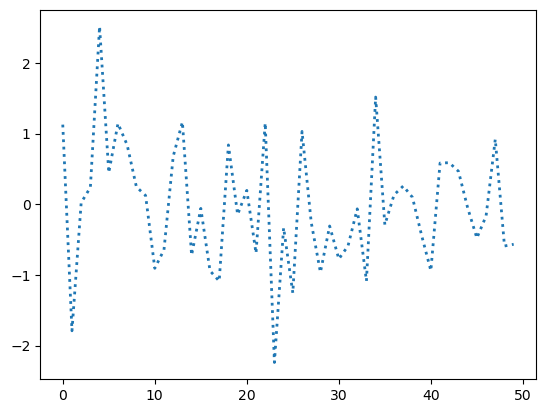

In [4]:
# since its a dictionary we can directly modify the values of the keys
mpl.rcParams["lines.linewidth"] = 2
mpl.rcParams["lines.linestyle"] = ":"

# using the pyplot API for quick visualization
plt.plot(std_normal_data)

plt.show()

#### <a id='toc1_2_2_'></a>[*Modify multiple settings of a single group (e.g, lines, font, animation, figure, axes etc.) at once with `matplotlib.rc()`*](#toc0_)

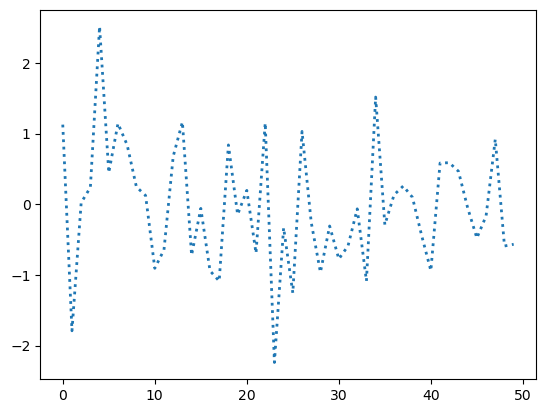

In [5]:
# the following is the equivalent of the code cell above
mpl.rc("lines", linewidth=2, linestyle=":")

plt.plot(std_normal_data)

plt.show()

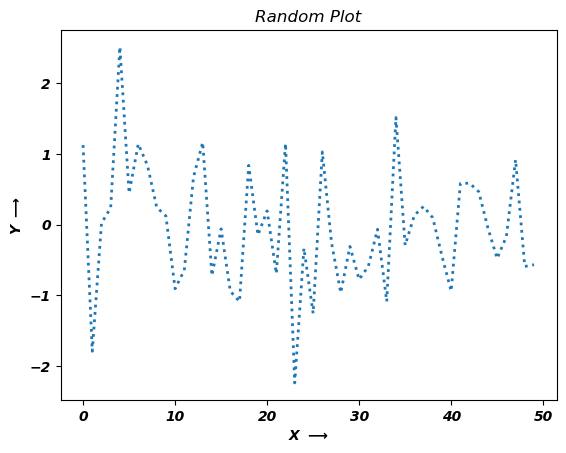

In [6]:
# we can also use a dict if we like (but we need to pass it as kwargs)
mpl.rc("font", **{"family": "sans-serif", "weight": "bold", "style": "italic"})

plt.plot(std_normal_data)
current_axes = plt.gca()
plt.setp(
    obj=current_axes,
    title="Random Plot",
    xlabel=r"$X\ \longrightarrow$",
    ylabel=r"$Y\ \longrightarrow$",
)

plt.show()

#### <a id='toc1_2_3_'></a>[*Restore the rcParams from Matplotlib's internal default style using `matplotlib.rcdefaults()`*](#toc0_)

In [7]:
mpl.rcdefaults()

#### <a id='toc1_2_4_'></a>[*Temporarily change rc settings with the `matplotlib.rc_context()` context manager*](#toc0_)

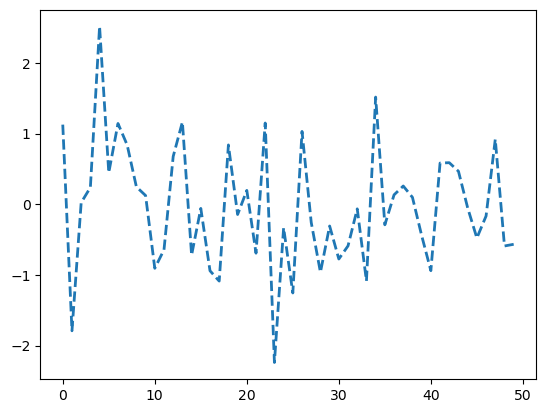

In [8]:
with mpl.rc_context({"lines.linewidth": 2, "lines.linestyle": "--"}):
    plt.plot(std_normal_data)

plt.show()

**`Note:`** matplotlib.rc_context can also be used as a decorator to modify the defaults within a function.

### <a id='toc1_3_'></a>[**Style Sheets**](#toc0_)

Another way to change the visual appearance of plots is to set the rcParams in a so-called style sheet and import that style sheet with `matplotlib.style.use(style_str_dict_path_list)`. In this way we can switch easily between different styles by simply changing the imported style sheet. 

See the documentation @https://matplotlib.org/stable/api/style_api.html#matplotlib.style.use.

There are a number of pre-defined styles provided by Matplotlib. For example, there's a pre-defined style called "ggplot", which emulates the aesthetics of ggplot (a popular plotting package for R).

- List all available styles (See examples of how some of them looks @[here](https://matplotlib.org/stable/gallery/style_sheets/style_sheets_reference.html))

In [9]:
print(plt.style.available)

['Solarize_Light2', '_classic_test_patch', '_mpl-gallery', '_mpl-gallery-nogrid', 'bmh', 'classic', 'dark_background', 'fast', 'fivethirtyeight', 'ggplot', 'grayscale', 'seaborn-v0_8', 'seaborn-v0_8-bright', 'seaborn-v0_8-colorblind', 'seaborn-v0_8-dark', 'seaborn-v0_8-dark-palette', 'seaborn-v0_8-darkgrid', 'seaborn-v0_8-deep', 'seaborn-v0_8-muted', 'seaborn-v0_8-notebook', 'seaborn-v0_8-paper', 'seaborn-v0_8-pastel', 'seaborn-v0_8-poster', 'seaborn-v0_8-talk', 'seaborn-v0_8-ticks', 'seaborn-v0_8-white', 'seaborn-v0_8-whitegrid', 'tableau-colorblind10']


#### <a id='toc1_3_1_'></a>[*Temporary styling with style sheets using the `plt.style.context()` context manager*](#toc0_)

If you only want to use a style for a specific block of code but don't want to change the global styling, the style package provides a context manager for limiting your changes to a specific scope. 

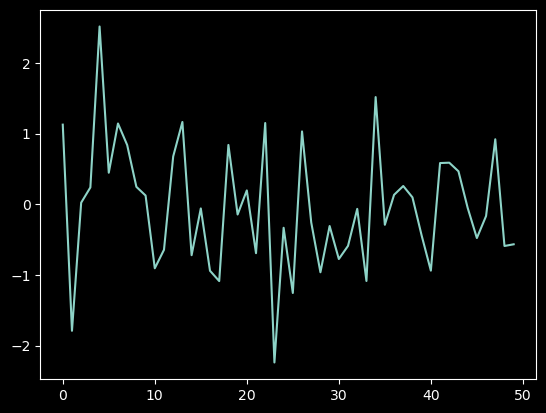

In [10]:
with plt.style.context({"dark_background"}):
    plt.plot(std_normal_data)

plt.show()